<a href="https://colab.research.google.com/github/alirezash97/BRATS2015/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!sudo apt-get install python-pip python-numpy python-scipy libboost-python-dev build-essential

In [0]:
!sudo pip install nibabel pydicom medpy

In [0]:
!pip install kaggle
!mkdir .kaggle
import json
token = {"username":"alirezashafaei97","key":"9cb262aa0c5658ffc4eb45857c41903c"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d andrewmvd/brain-tumor-segmentation-in-mri-brats-2015 -p /content



In [0]:
!unzip /content/brain-tumor-segmentation-in-mri-brats-2015.zip -d /content/BTS

In [0]:
import glob, os
HGG = glob.glob('/content/BTS/train/HGG/**/*.mha', recursive=True)
LGG = glob.glob('/content/BTS/train/LGG/**/*.mha', recursive=True)

In [2]:
print(len(HGG))
print(len(LGG))

1100
270


In [0]:
T1_HGG = []
T1_LGG = []
for item in HGG:
  if 'T1.' in item:
    T1_HGG.append(item)
  else:
    pass

for item in LGG:
  if 'T1.' in item:
    T1_LGG.append(item)
  else:
    pass

In [4]:
print(len(T1_HGG))
print(len(T1_LGG))

220
54


In [0]:
T1_HGG = T1_HGG[:100]

In [0]:
from medpy.io import load
import matplotlib.pyplot as plt
import numpy as np



trainset_HGG = np.zeros((100, 240, 240, 155))
# trainset_LGG = np.zeros((100, 240, 240, 155))


# for index, dir_address in enumerate(HGG) :
  
#   temp = load(dir_address)
#   trainset_HGG[index, :, :, :] = np.array(temp)



for index, dir_address in enumerate(T1_HGG) :
  
  temp, header = load(dir_address)
  trainset_HGG[index, :, :, :] = np.array(temp)



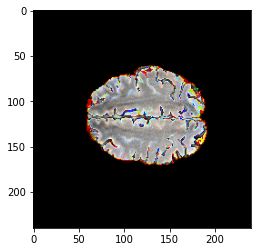

In [24]:

plt.imshow((trainset_HGG[12, :, :, 110:113] * 255).astype(np.uint8))

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def ploter(image_data):
  fig=plt.figure(figsize=(10, 10))
  columns = 4
  rows = 5
  counter = 0
  for i in range(40, 52):
      counter += 1
      img = mage_data[:, :, i]
      fig.add_subplot(rows, columns, counter)
      plt.imshow(img, cmap='gray')
  plt.show()


this is FLAIR MRI


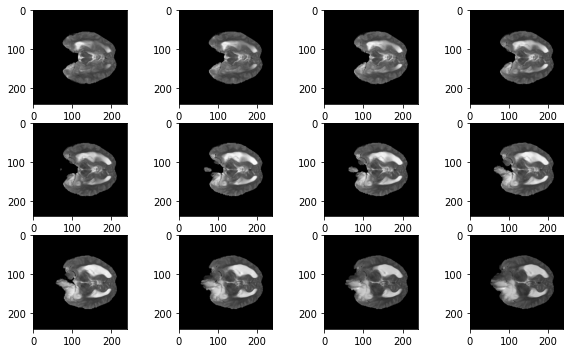

this is T1 MRI


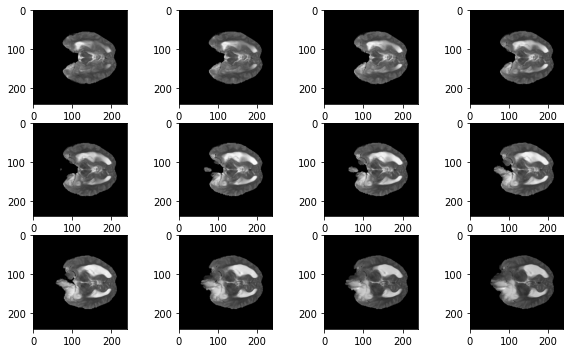

this is T1c MRI


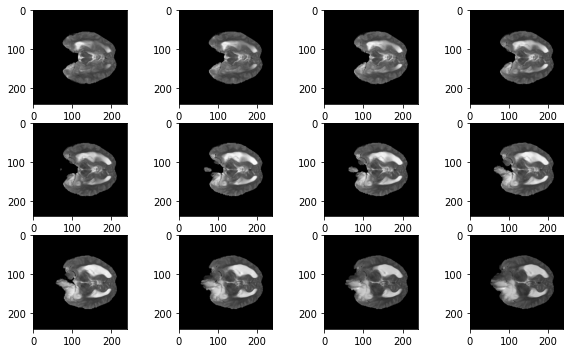

this is T2 MRI


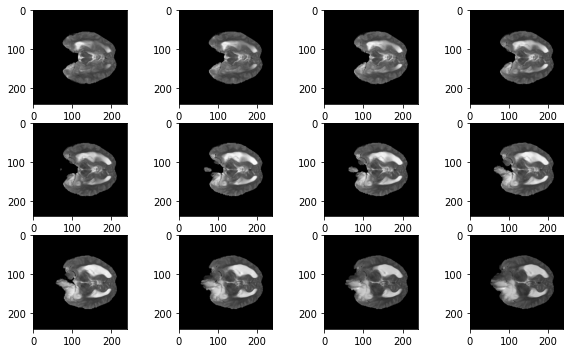

this is T MRI


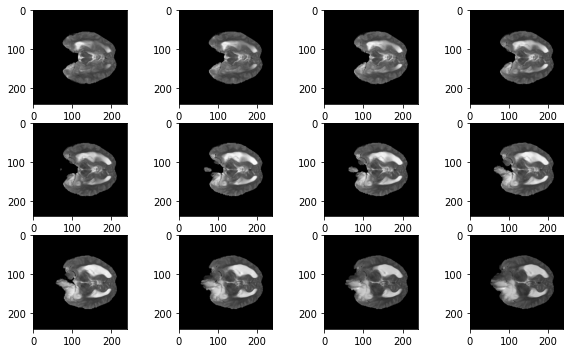

In [0]:
print("this is FLAIR MRI")
ploter(mage_data_flair)
print("this is T1 MRI")
ploter(mage_data_T1)
print("this is T1c MRI")
ploter(mage_data_T1c)
print("this is T2 MRI")
ploter(mage_data_T2)
print("this is T MRI")
ploter(mage_data_T)